In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("./bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [4]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [5]:
df_original = df

In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [7]:
scale_mapper = {
    "no": 0,
    "yes": 1,
}
df['housing'] = df['housing'].replace(scale_mapper)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,0,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,0,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,0,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,1,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,0,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [8]:
df = pd.get_dummies(df, columns=['contact', 'poutcome', 'education'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,job,marital,default,balance,housing,loan,day,month,duration,...,previous,subscribed,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,education_secondary,education_tertiary,education_nan
1995,20.0,student,single,no,2785,0,no,16,sep,327,...,0,yes,0,0,0,0,1,0,0,1
1996,28.0,admin.,single,no,127,0,no,16,sep,1334,...,0,yes,0,0,0,0,1,1,0,0
1997,81.0,retired,married,no,1154,0,no,17,sep,231,...,0,yes,1,0,0,0,1,0,0,0
1998,46.0,services,married,no,4343,1,no,20,sep,185,...,0,yes,0,1,0,0,1,0,0,0
1999,40.0,entrepreneur,married,no,6403,0,no,22,sep,208,...,0,yes,0,0,0,0,1,1,0,0


In [9]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,housing,day,duration,campaign,pdays,previous,contact_telephone,contact_nan,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,subscribed_yes
0,32.0,392,1,1,957,2,131,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39.0,688,1,1,233,2,133,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,1035,1,1,126,2,239,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47.0,398,1,1,274,1,238,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54.0,1004,1,1,479,1,307,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.isna().sum()

age                    12
balance                 0
housing                 0
day                     0
duration                0
campaign                0
pdays                   0
previous                0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
education_secondary     0
education_tertiary      0
education_nan           0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
marital_married         0
marital_single          0
default_yes             0
loan_yes                0
month_aug               0
month_dec               0
month_feb               0
month_jan               0
month_jul               0
month_jun               0
month_mar               0
month_may               0
month_nov   

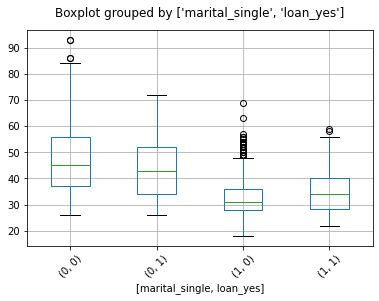

In [11]:
df.boxplot(column='age', by=['marital_single','loan_yes'], rot=45)
plt.title("")
plt.show()

In [12]:
ptable = df.pivot_table(values='age', 
                        index='marital_single',
                        columns='loan_yes',  
                        aggfunc=np.median)
ptable

loan_yes,0,1
marital_single,,
0,45.0,43.0
1,31.0,34.0


In [13]:
def get_element(x):
    return ptable.loc[x['loan_yes'], x['marital_single']]
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [14]:
df['campaign'].fillna(df['campaign'].median(), inplace=True)
df['previous'].fillna(df['previous'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)

In [15]:
robust_scaler = RobustScaler()
df[['balance','age']] = robust_scaler.fit_transform(df[['balance','age']])

In [16]:
df['loan_yes'] = df['loan_yes']/2

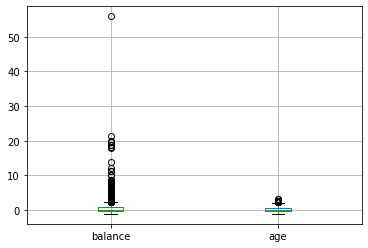

In [17]:
df.boxplot(column=['balance','age'])
plt.show()

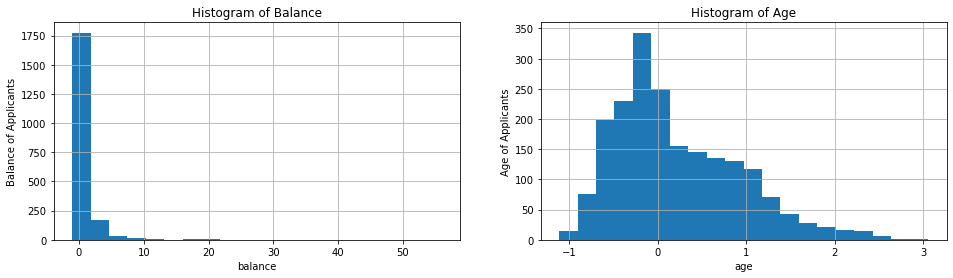

In [18]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))
# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Balance of Applicants')
df['balance'].hist(bins=20)
# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Age")
ax3.set_xlabel('age')
ax3.set_ylabel('Age of Applicants')
df['age'].hist(bins=20)
plt.show()

In [19]:
df[['balance', 'age']].min()

balance   -1.060984
age       -1.111111
dtype: float64

In [20]:
df['balance'] = np.log(df['balance']+2.26)
df['age'] = np.log(df['age']+2.85)

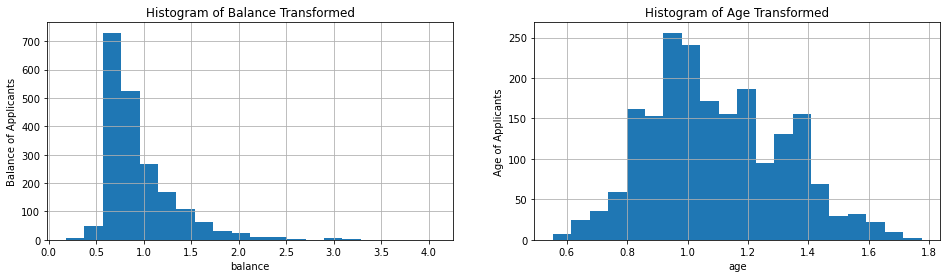

In [21]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))
# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance Transformed")
ax1.set_xlabel('balance')
ax1.set_ylabel('Balance of Applicants')
df['balance'].hist(bins=20)
# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Age Transformed")
ax3.set_xlabel('age')
ax3.set_ylabel('Age of Applicants')
df['age'].hist(bins=20)
plt.show()

In [22]:
df['duration'].value_counts()

200     12
219     11
90      11
150     10
161     10
        ..
624      1
630      1
633      1
634      1
1823     1
Name: duration, Length: 655, dtype: int64

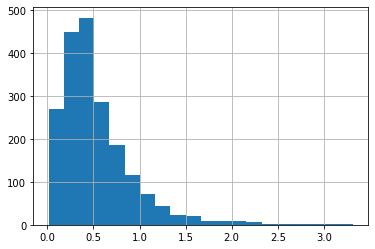

In [23]:
df['duration'] = df['duration']/550
df['duration'].hist(bins=20)
plt.show()

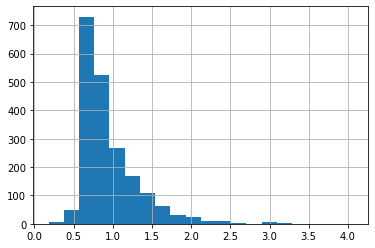

In [24]:
df['balance'].hist(bins=20)
plt.show()

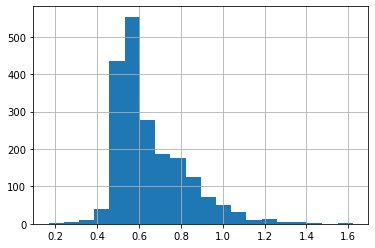

In [25]:
np.log(df['balance']+1).hist(bins=20)
plt.show()

In [26]:
df['adjusted_balance'] = df['balance'] / df['day']
df[['adjusted_balance']] = robust_scaler.fit_transform(df[['adjusted_balance']])
df[['adjusted_balance']].min()

adjusted_balance   -0.571711
dtype: float64

In [27]:
df['adjusted_balance'] = np.log(df['adjusted_balance']+2.19)

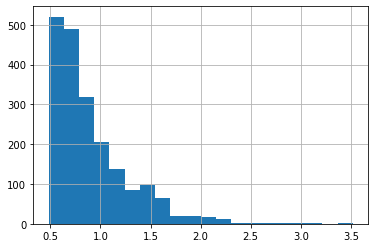

In [28]:
df['adjusted_balance'].hist(bins=20)
plt.show()

In [29]:
df.drop('balance', axis=1, inplace=True)

In [30]:
df.to_csv('etivity_2_task_3_data.csv')